## Tarea 8

## Ejercicio 1

In [171]:
function derivadanumerica(f,x0,h)
    (f(x0+h)-f(x0))/h
end

derivadanumerica (generic function with 1 method)

In [182]:
f(x)=cos(x)

In [195]:
derivadanumerica(f,0,1e-5)

-5.000000413701855e-6

## Ejercicio 2


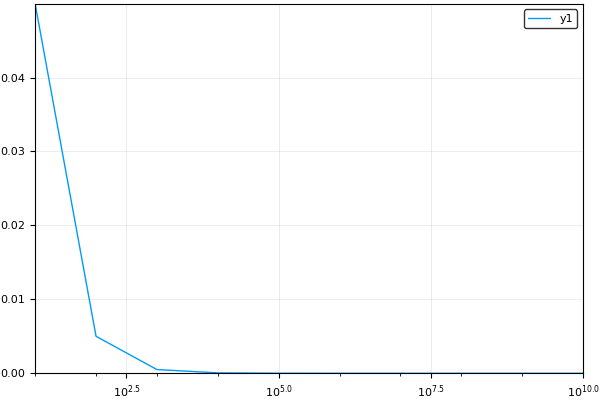

In [183]:
h=[]
hinverso=[]  #definí estos pasos con for ya que la funcion linspace pierde precision al dividir intervalos
for i in 1:10
    push!(h,1/10^i)
end

for i in 1:10
    push!(hinverso,1/h[i])
end     
using SymPy
derivadasimpy=lambdify(diff(f))
Dev=derivadanumerica.(f,0,h)
using Plots
plot(hinverso,abs.(Dev),xscale=:log10)

Podemos notar que conforme h es más pequeña y por lo tanto 1/h más grande el valor de la derivada numerica se aproxima más al valor de la derivada exacta que es 0, la relación es casi lineal desde $\frac{1}{h}=10^1$ hasta $\frac{1}{h}=10^6$, lo grafiqué en escala logaritmica para poder comparar las potencias.



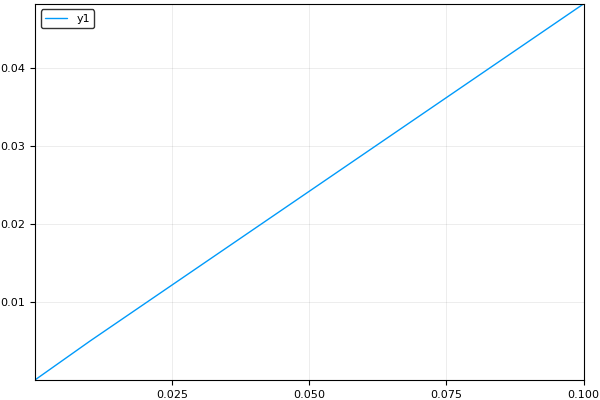

In [185]:
ϵ=(derivadanumerica.(f,pi/4,h)-derivadasimpy(pi/4))/derivadasimpy(pi/4)
plot(h,ϵ)

Podemos notar rápidamente que el error es de orden h pues la realción es lineal.


## Ejercicio 3

Usando el tip que se da en el notebook de la clase podemos considerar la expansion en serie de Taylor de $f(x-h)$ y obtenemos \begin{equation} f'(x-h)=f(x)-\frac{df(x)}{dx}h+\frac{d^2f(x)}{dx^2}\frac{h^2}{2!}-... \end{equation}

una expansion con términos pares positivos y términos impares negativos, para mejorar el valor de la derivada queremos disminuir el valor del error y con ese fin necesitamos queremos que el error sea de orden $h^2$ o más.

Ahora restamos las series de Taylor de $f(x+h)$ y $f(x-h)$
$$f(x+h)-f(x-h)=2(\frac{df(x)}{dx}h+\frac{d^3f(x)}{dx^3}\frac{h^3}{3!}+O(h^5)+...)$$

por lo tanto encontramos la siguiente relación 

$$\frac{f(x+h)-f(x-h)}{2h}=\frac{df(x)}{dx}+\frac{d^3f(x)}{dx^3}\frac{h^2}{3!}+...$$

Por lo tanto el error que obtendrémos con esta nueva aproximación será de orden $h^2$ esto es fácil de ver pues se tiene
$$\frac{f(x+h)-f(x-h)}{2h}-\frac{df(x)}{dx}=O(h^2)$$



Creo que si bien existen diferentes métodos para diferenciar una función computacionalmente no podemos hacer que el límite de h tienda a 0 de manera continua, las computadoras realizan todo de manera discreta por lo tanto siempre tendrémos que fijarnos en el orden de $h^k$ para saber cual es el error que estamos cometiendo al aproximar h por valores pequeños en lugar de tomar un límite real. 

## Ejercicio 4

In [191]:
function derivada_Simetrica(f,xo,h)
    (f(xo+h)-f(xo-h))/(2h)
end

derivada_Simetrica (generic function with 1 method)

In [194]:
derivada_Simetrica(f,0,1e-5)

0.0


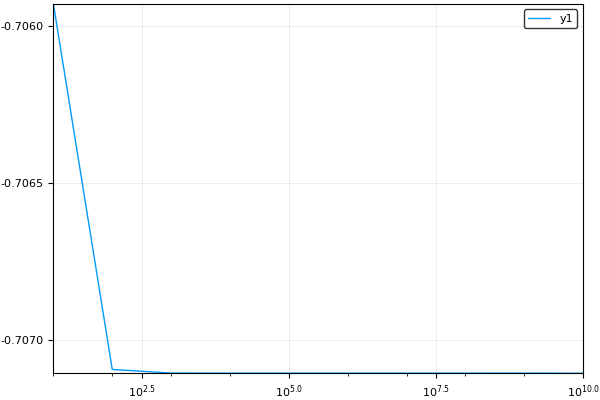

In [200]:
DevS=derivada_Simetrica.(f,pi/4,h)
δ=(derivada_Simetrica.(f,pi/4,h)-derivadasimpy(pi/4))/derivadasimpy(pi/4)
plot(hinverso,DevS,xscale=:log10)

Podemos notar que esta es una exponencial con un decaimento aun mayor como se esperaba, esto porque la función converge más rapidamente a la solución exacta.


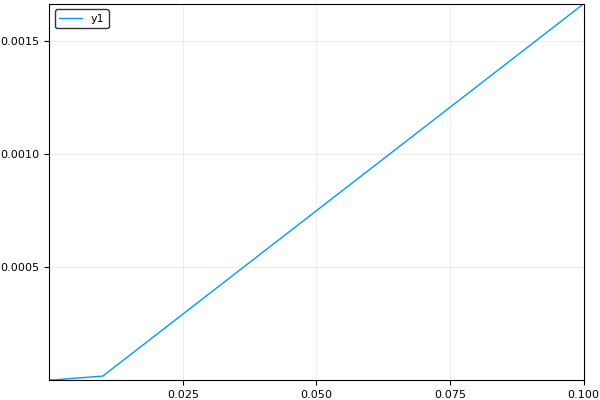

In [203]:
plot(h,abs.(δ))

Podemos notar que el comportamiento de esta gráfica es el de una parabola, coincidiendo con lo que esperabamos de la dependencia del error relativo en $h^2$

## Ejercicio 5

Se dice un operador $\hat{L}$ es lineal si cumple las siguientes propiedades $$\hat{L}(tf)=t\hat{L}(f)$$ y 
$$\hat{L}(f+g)=\hat{L}(f)+\hat{L}(g)$$

Veamos ahora que si $L=\frac{d}{dx}$ entonces podemos provar la primera propiedad usando la regla de la cadena.

$$\frac{d(cf)}{dx}=\frac{fdc}{dx}+\frac{cdf}{dx}$$ 

como la derivada de una constante es 0, entonces. 

$$\frac{d(cf)}{dx}=c\frac{df}{dx}$$ 

Ahora podemos probar la otra propiedad usando la definicion de derivada

\begin{align}
(f+g)'(x) &= \lim_{h\to0}\frac{(f+g)(x+h)-(f+g)(x)}{h}\\
&=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}+\frac{g(x+h)-g(x)}{h}\\
&=f'(x)+g'(x)\\
\end{align}

Por lo tanto la derivada es lineal y podemos factorizar f del operador. 

## Ejercicio 6

Demostrar que dado el operador derivada $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$ si escribimos este como una funcion evaluada en$\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$ es decir  $$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.

entonces $\phi(x)=e^x-1$

Demostración

\begin{align}
\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}_{\xi=x}&=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\frac{d^n}{d\xi^n}_{\xi=x }+0\\
&=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\frac{d^n}{d\xi^n}_{\xi=x }+1-1\\
&=\sum_{n=0}^{\infty} \frac{1}{n!}h^n\frac{d^n}{d\xi^n}_{\xi=x }-1\\
&=e^{h\frac{d}{d\xi}_{x=\xi}}-1
\end{align}

Usando la definición de exponencial y sumando un 0 en la forma de 1-1, podemos ver que la función $\phi(x)$ es $e^x-1$.

## Ejercicio 7

 Queremos calcular $\delta_h=\Delta_h-\Delta_{-h}$ así que partimos de la diferencia
 
\begin{align}
\delta_h=\Delta_h-\Delta_{-h} &= e^{h\frac{d}{d\xi}_{x=\xi}}-1-e^{-h\frac{d}{d\xi}_{x=\xi}}+1\\
&=e^{h\frac{d}{d\xi}_{x=\xi}}-e^{-h\frac{d}{d\xi}_{x=\xi}}\\
&=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\frac{d^n}{d\xi^n}_{\xi=x }-\sum_{n=1}^{\infty} \frac{1}{n!}(-h)^n\frac{d^n}{d\xi^n}_{\xi=x }\\
&=2(\frac{d}{d\xi}_{\xi=x}+\frac{1}{3!}\frac{d^3}{d\xi^3}_{\xi=x}+...)\\
&=2sinh(h\frac{d}{d\xi}_{\xi=x})
\end{align}
 
De este modo podemos calcular quien es $h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$ tomando la función inversa.

\begin{align}
\frac{d}{d\xi}_{\xi=x }&=\frac{sinh^{-1}(\frac{\delta_h}{2})}{h}\\
&=\frac{1}{h}[\frac{\delta_h}{2}-\frac{(\frac{\delta_h}{2})^3}{6}+\frac{3(\frac{\delta_h}{2})^5}{40}+...]\\
\end{align}

:)